# 🎮 Analiza sprzedaży gier komputerowych
**Autor:** Artur Rapacz     
**Cel:** Analiza trendów sprzedaży gier na różnych platformach i rynkach.

In [35]:
#Import bibliotek
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("bmh")

In [48]:
#Wczytywanie danych
df = pd.read_csv('./data/vgsales.csv', index_col='Rank')
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [37]:
#Wstępna analiza
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [38]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [200]:
#Czyszczenie danych
df['Year'] = df['Year'].fillna(0)
df['Publisher'] = df['Publisher'].fillna("Unknown")
df['Year'] = df['Year'].astype(int)


<Axes: title={'center': 'Najlepiej sprzedające się gry'}, xlabel='Tytuł', ylabel='Liczba sprzedanych kopii [mln]'>

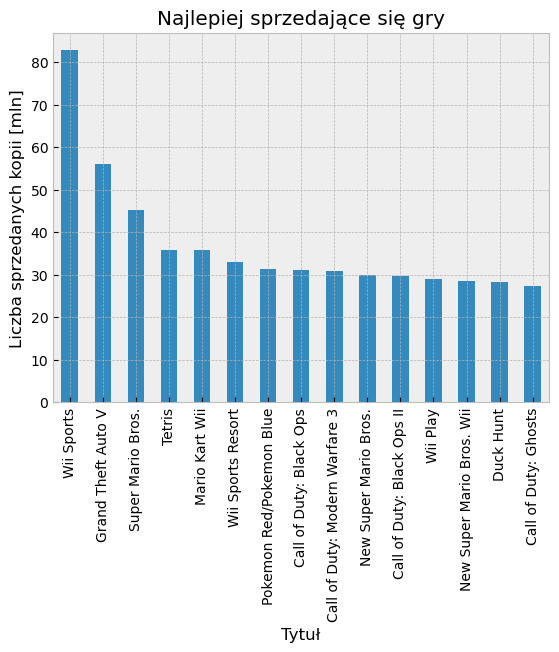

In [202]:
#Najlepiej sprzedające się gry
totalSales = df.groupby(by='Name')['Global_Sales'].sum().sort_values(ascending=False)
totalSales[:15].plot(kind='bar', xlabel='Tytuł', ylabel='Liczba sprzedanych kopii [mln]', title='Najlepiej sprzedające się gry')

<Axes: title={'center': 'Liczba sprzedanych gier z podziałem na platformy'}, xlabel='Konsola', ylabel='Liczba sprzedanych kopii [mln]'>

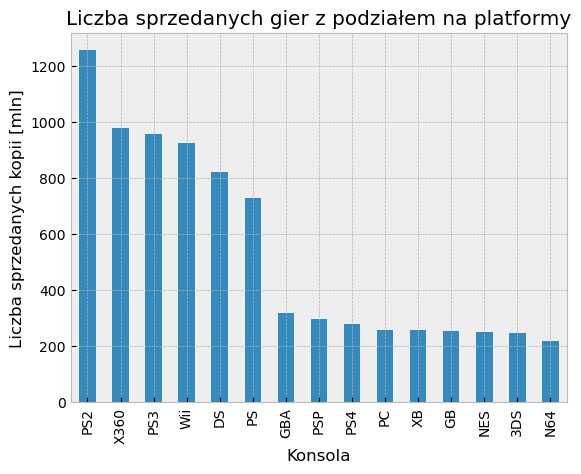

In [194]:
#Liczba sprzedanych gier z podziałem na platformy
platformSales = df.groupby("Platform")['Global_Sales'].sum().sort_values(ascending=False)
platformSales[:15].plot(kind='bar', ylabel='Liczba sprzedanych kopii [mln]', xlabel='Konsola', title='Liczba sprzedanych gier z podziałem na platformy')

<Axes: title={'center': 'Liczba sprzedanych kopii z podziałem na gatunki'}, xlabel='Liczba sprzedanych kopii [mln]', ylabel='Gatunek'>

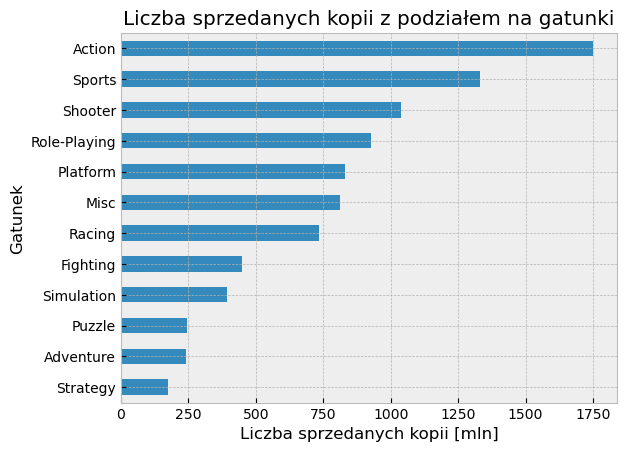

In [198]:
#Liczba sprzedanych gier z podziałem na gatunki
genreSales = df.groupby(by='Genre')['Global_Sales'].sum().sort_values(ascending=True)
genreSales.plot(kind='barh', xlabel='Liczba sprzedanych kopii [mln]', ylabel='Gatunek', title='Liczba sprzedanych kopii z podziałem na gatunki')

<Axes: title={'center': 'Procentowa sprzedaż z podziałem na rynki'}>

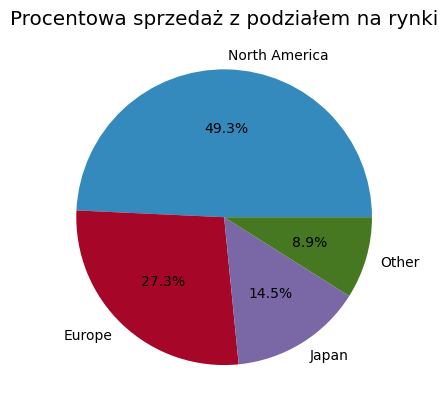

In [164]:
#Procentowy udział rynków w sprzedaży
region_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
df[region_cols].sum().plot(kind='pie', labels=['North America', 'Europe', 'Japan', 'Other'], autopct='%1.1f%%', 
                           title='Procentowy udział rynków w sprzedaży')

<Axes: title={'center': 'Globalna sprzedaż z podziałem na lata'}, xlabel='Rok', ylabel='Liczba sprzedanych kopii [mln]'>

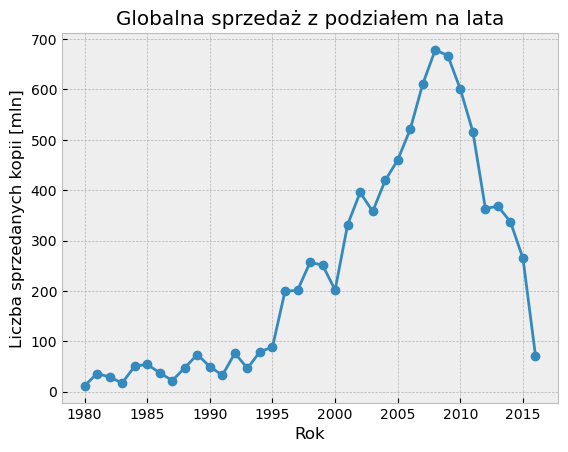

In [230]:
#Globalna sprzedaż gier z podziałem na lata
globalSales = df[~df['Year'].isin([0, 2017, 2020])].groupby('Year')['Global_Sales'].sum()
globalSales.plot(title='Globalna sprzedaż z podziałem na lata', xlabel='Rok', ylabel='Liczba sprzedanych kopii [mln]',
                marker='o')

## Wnioski
Z analizy powyżej wynika że najlepiej sprzedające się gry wszech czasów to serie Wii Sports, Grand Theft Auto V oraz Mario. Najpopularniejsze platformy pod względem ilości gier zakupionych w sklepie to PlayStation 2 oraz Xbox360, których czasy świetności przypadają na olbrzymi trend wzrostowy sprzedaży gier na nośnikach fizycznych, czyli lata 2000-2008. Późniejszy spadek może być tłumaczony wzrostem popularności zakupu gier w wersji cyfrowej. Najpopularniejsze gatunki to gry akcji, sportowe oraz strzelanki. Prawie połowa wolumenu sprzedaży przypada na Amerykę Północną, 27% na Europę, a niecałe 15% to sprzedaż na rynku japońskim. 